In [1]:
import sys
import os
from os import listdir, makedirs
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/home/natacha/Documents/Work/")  # to import galib
sys.path.insert(1, os.path.join(sys.path[0], '../..'))  #to use TopEns submodules

from TopEns.DataAnalysis.statistics import extract_variables, standardize
from galib.tools.plt import from_list_to_subplots, add_labels_to_legend, set_fonts
from galib.tools.stats import gauss_mixture, gauss_modes_in_time_series
from galib.tools.lists import flatten, get_indices_element
from netCDF4 import Dataset


### Plot two gaussians

In [2]:
nsamples = 10000
list_params = [(2, 0.5), (-2, 1)]
print(list_params)
gaussian_mixt = gauss_mixture(
    list_params=list_params
)
kwargs = {
    "plt_type" : "distplot",
}
fig, ax = from_list_to_subplots(
    gaussian_mixt,
    **kwargs,
)

[(2, 0.5), (-2, 1)]


KeyError: 'fit_kw'

In [3]:
kwargs = {
    "plt_type" : "distplot",
    "fit_type" : "None"
}
fig, ax = from_list_to_subplots(
    gaussian_mixt,
    **kwargs,
)

KeyError: 'fit_kw'

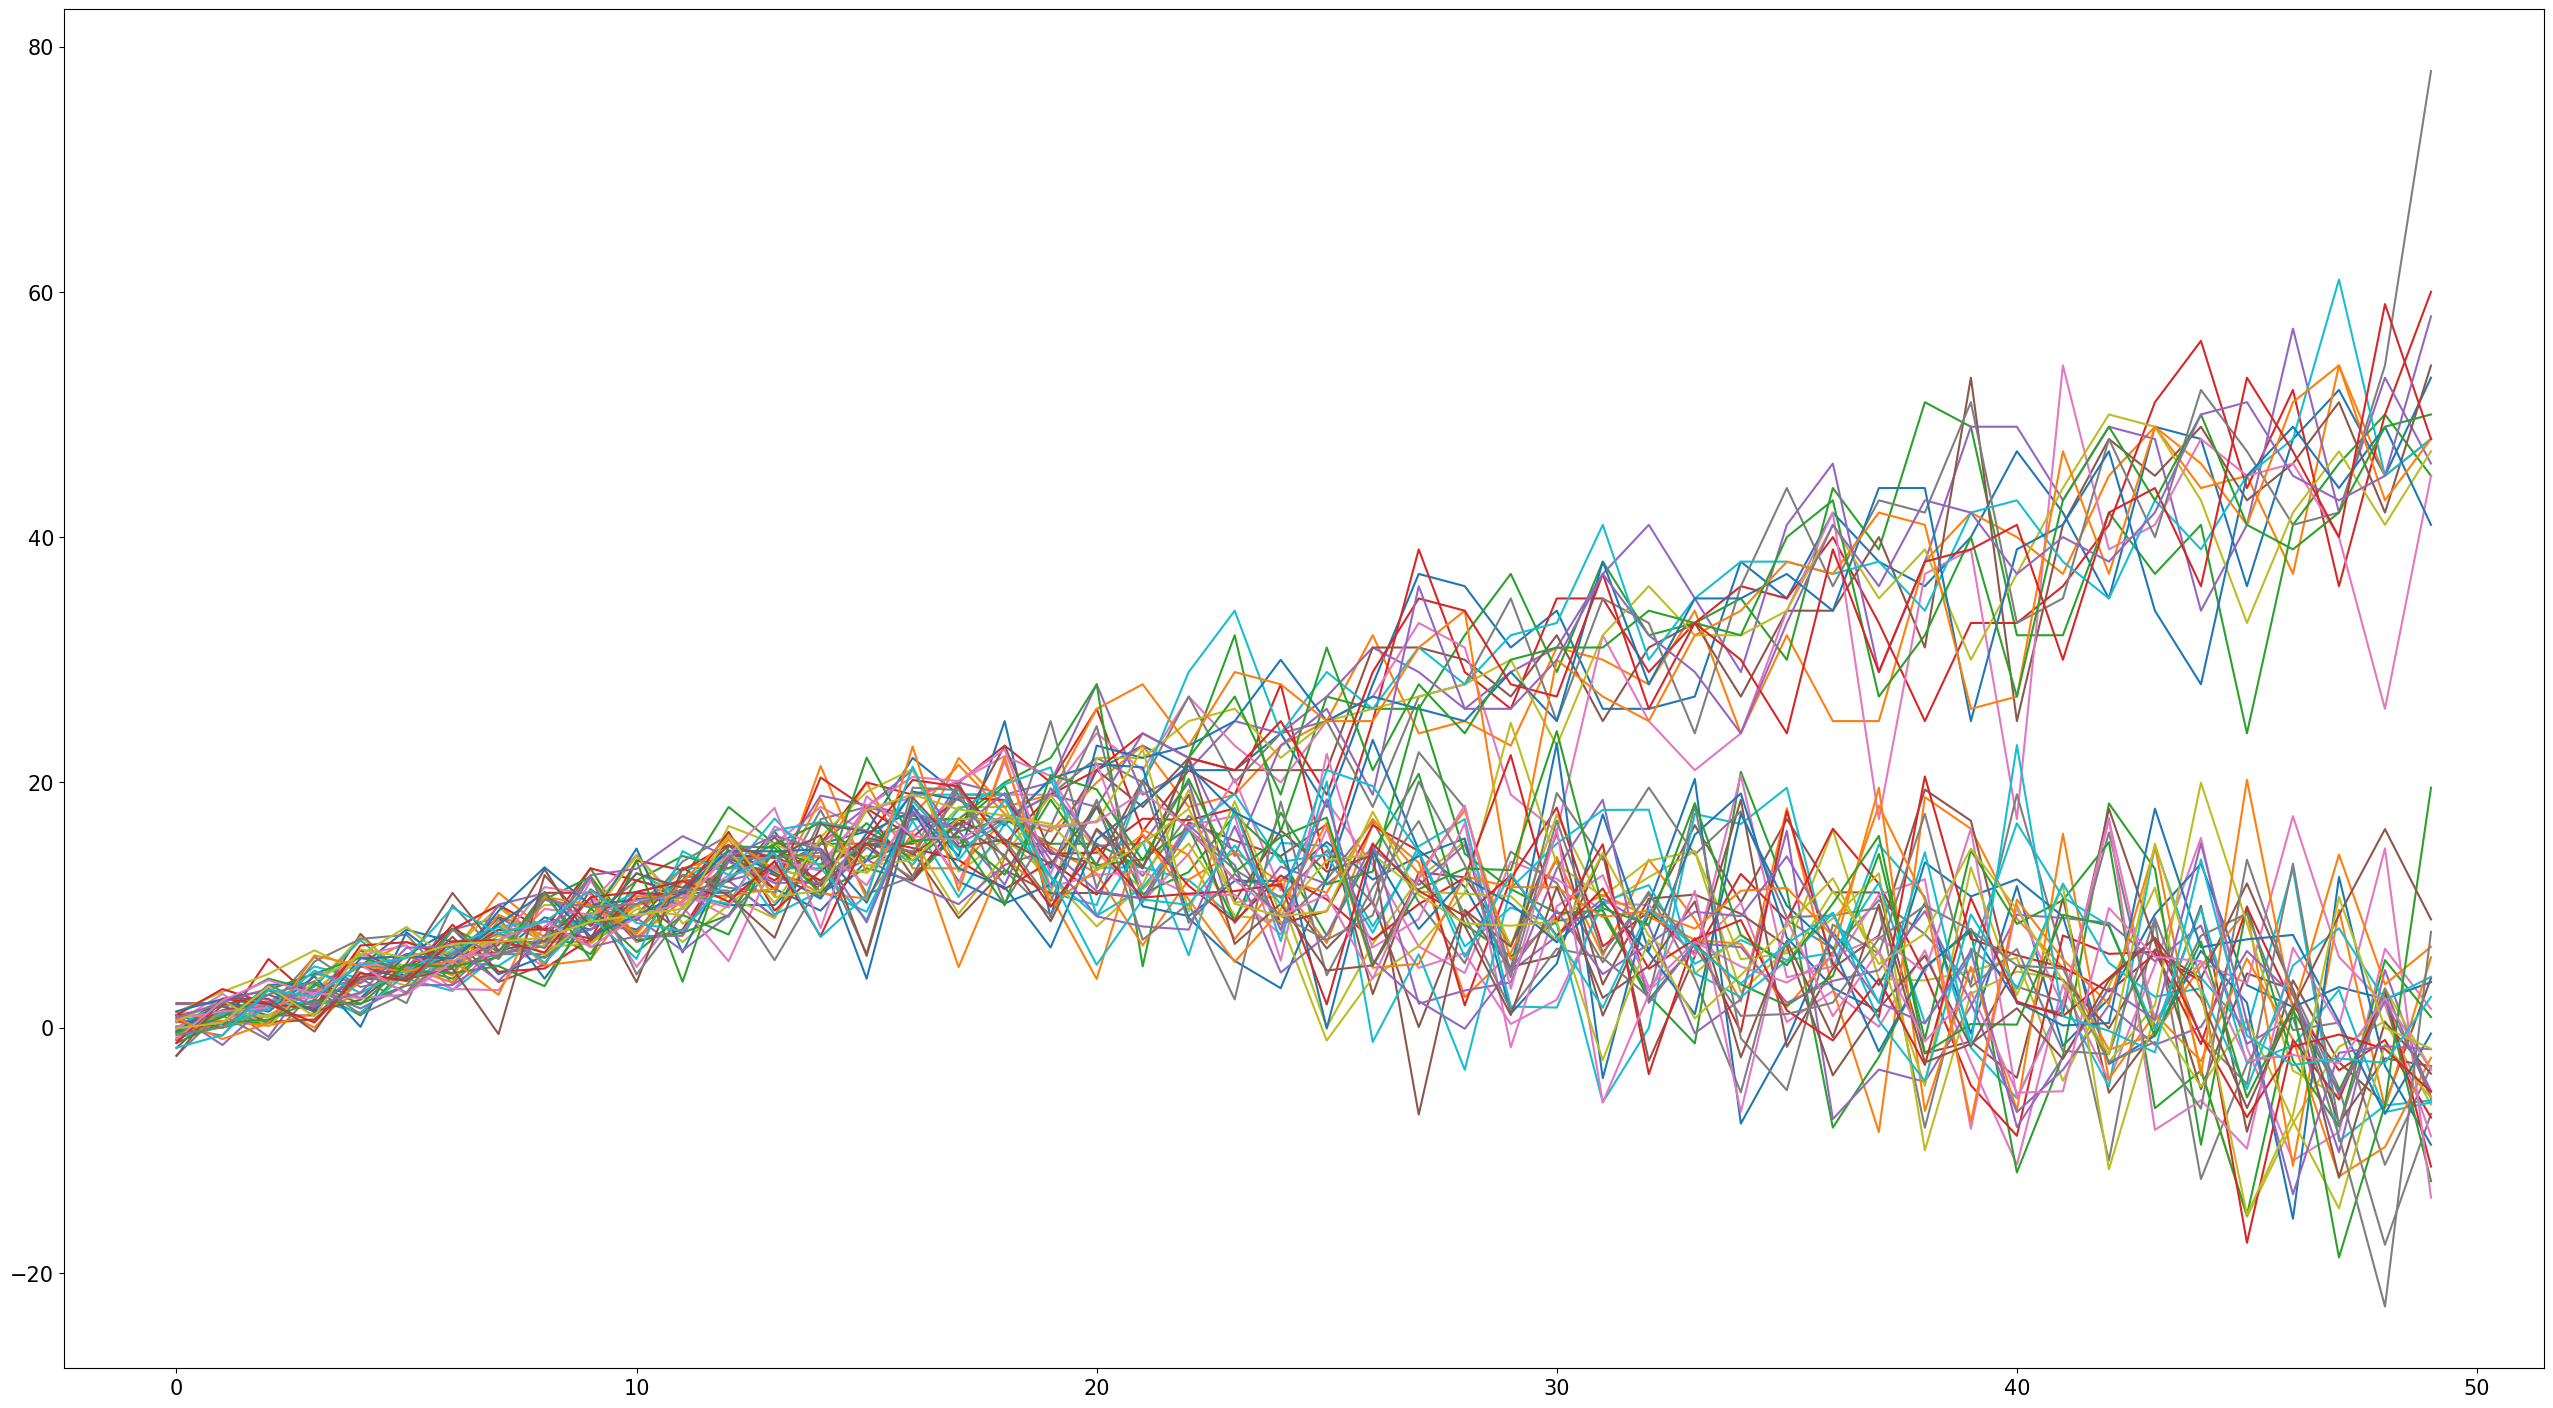

In [4]:
params = {
    'list_yvalues' : None,  #List functions
    'list_params' : [(0,1) , (0,1)], #List[(mu, sigma)]
    'nxvalues': 50,
    'nmembers': 50,
    'list_prop': [0.3, 0.7],   # Proportion of members for each line
    'shuffled_members' : False,
    "sigma_increasing_rate" : 0.15,
}
kwargs = {
    "figsize" : (32,18)
}

list_yvalues, list_members = gauss_modes_in_time_series(**params)

fig, ax = from_list_to_subplots([np.concatenate(list_members)],**kwargs)

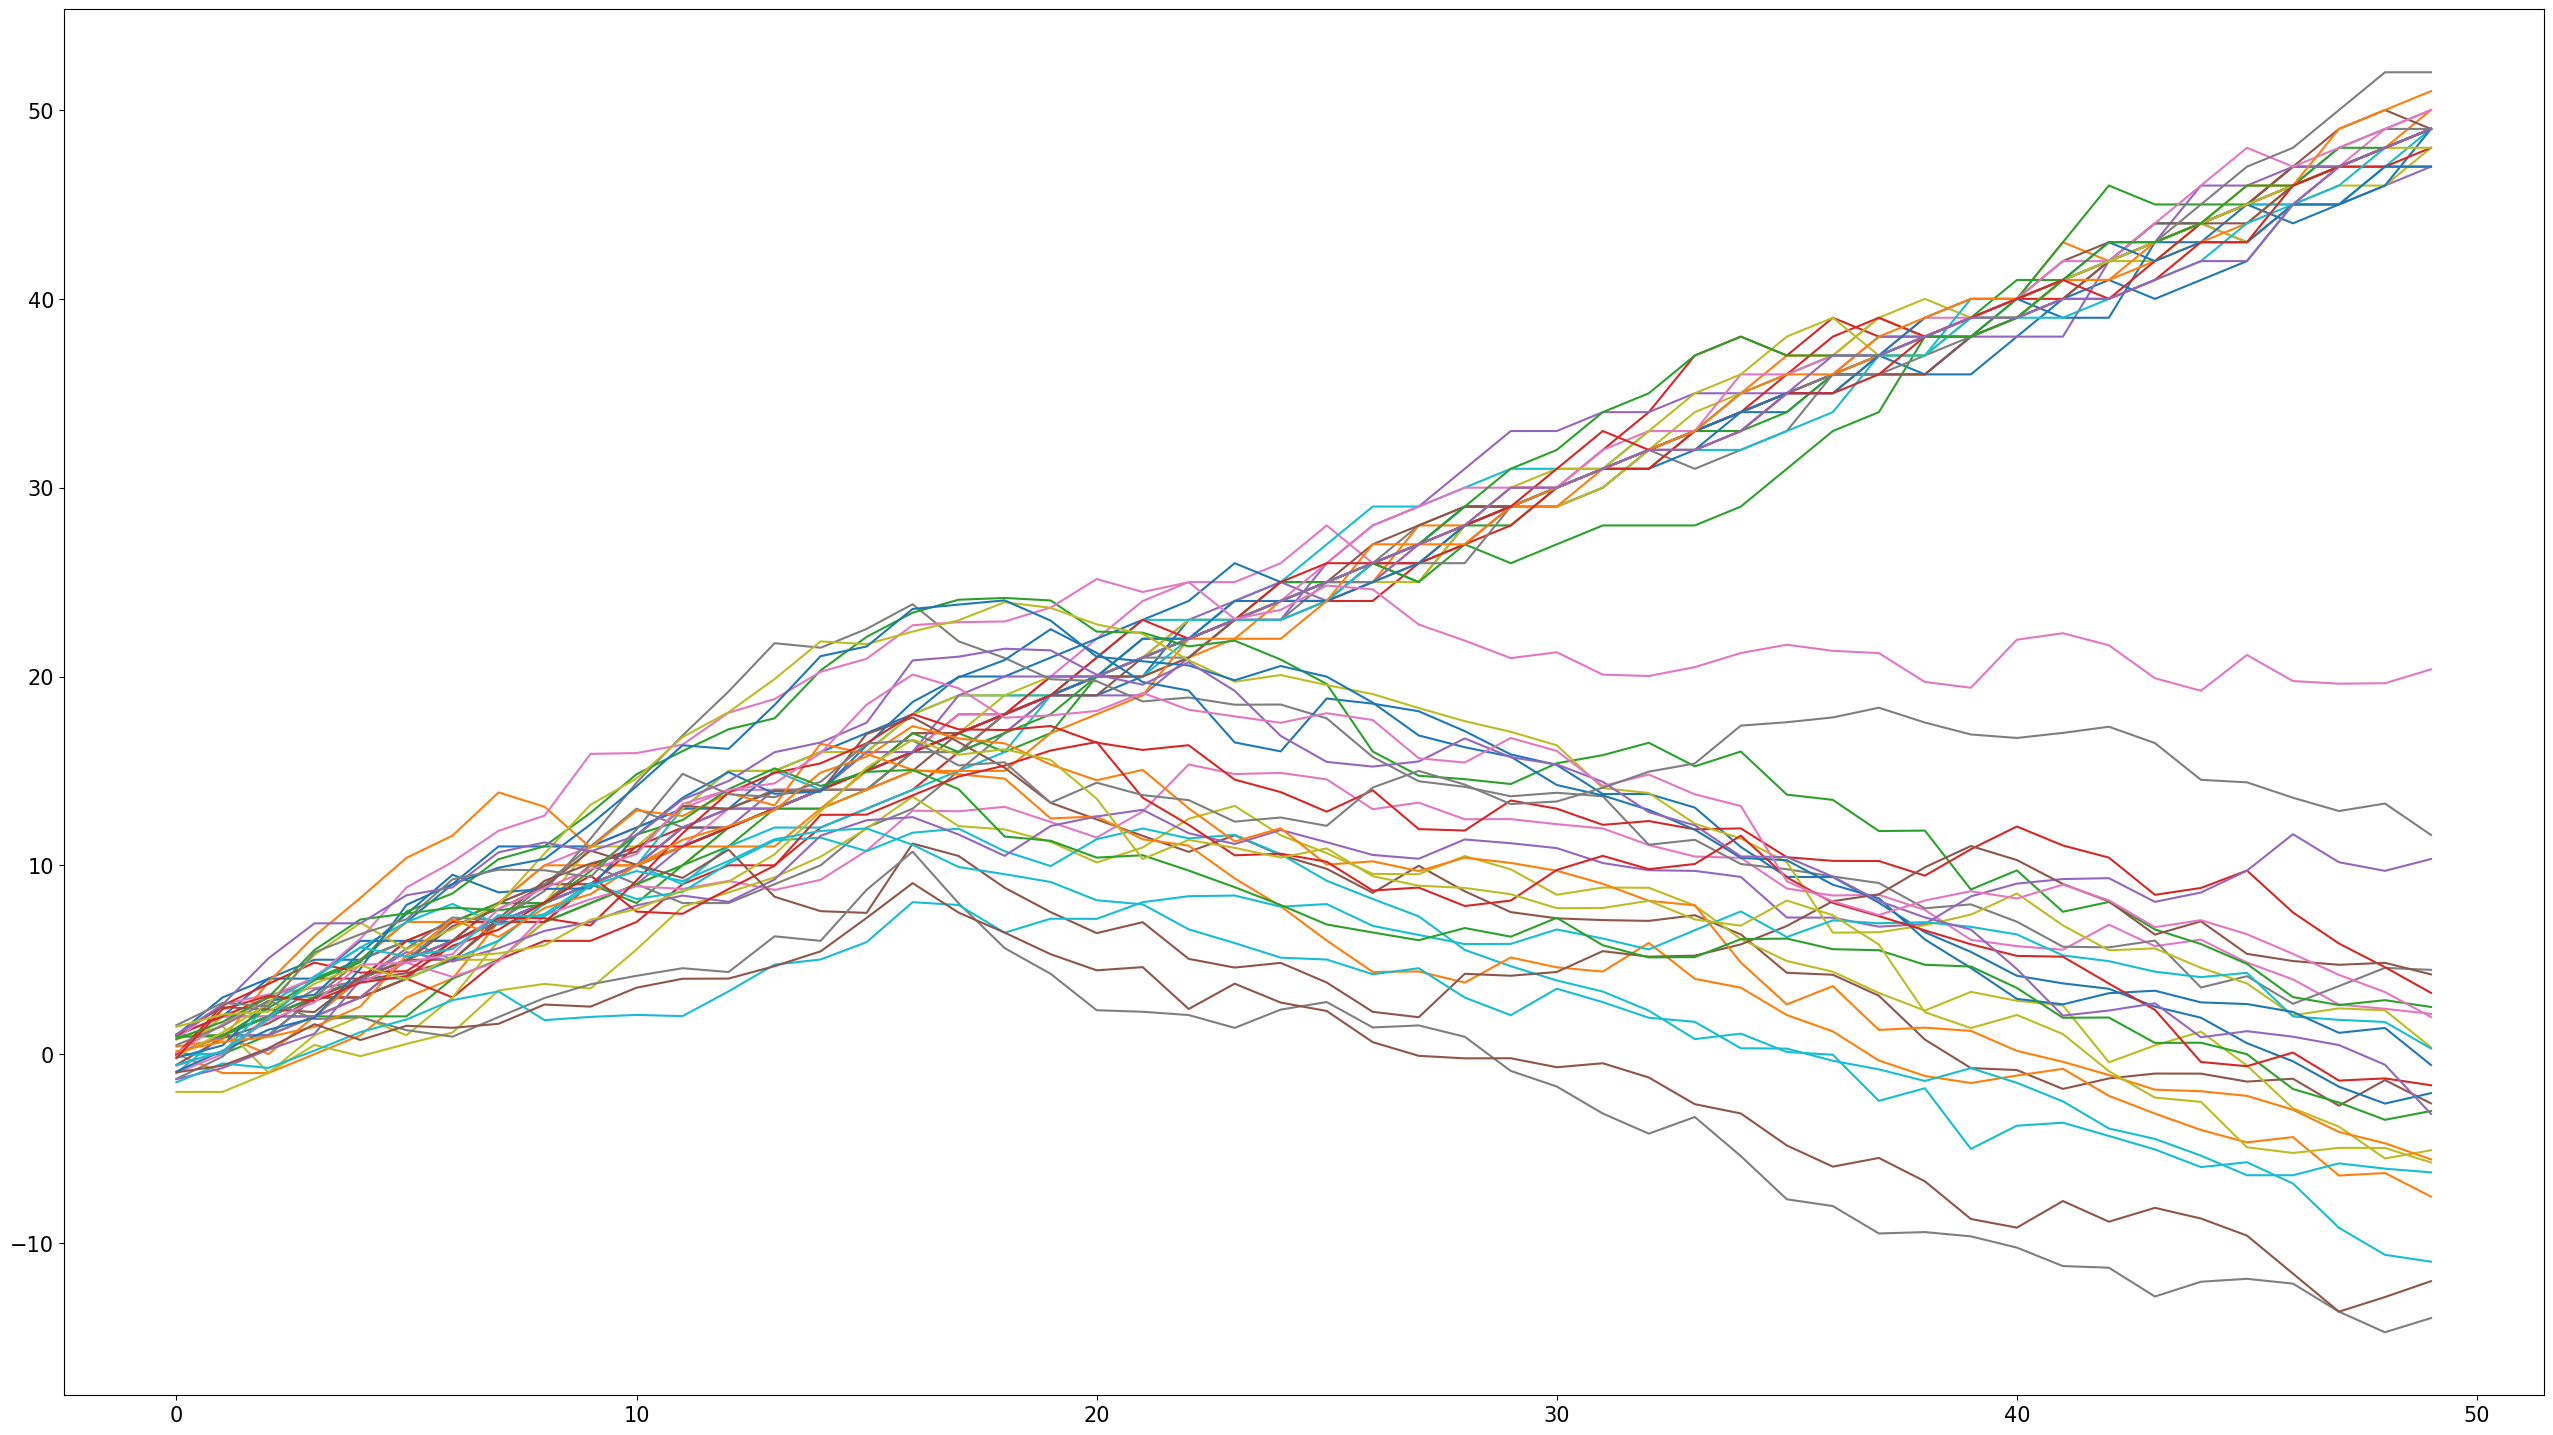

In [5]:
params = {
    'list_yvalues' : None,  #List functions
    'list_params' : [(0,1) , (0,1)], #List[(mu, sigma)]
    'nxvalues': 50,
    'nmembers': 50,
    'list_prop': [0.5, 0.5],   # Proportion of members for each line
    'shuffled_members' : False,
    "sigma_increasing_rate" : 0,
    "chaotic" : True
}
kwargs = {
    "figsize" : (32,18),
    "plot_show_mean" : False,
    "plot_show_std" : False,
}

list_yvalues, list_members = gauss_modes_in_time_series(**params)
fig, ax = from_list_to_subplots([np.concatenate(list_members)],**kwargs)

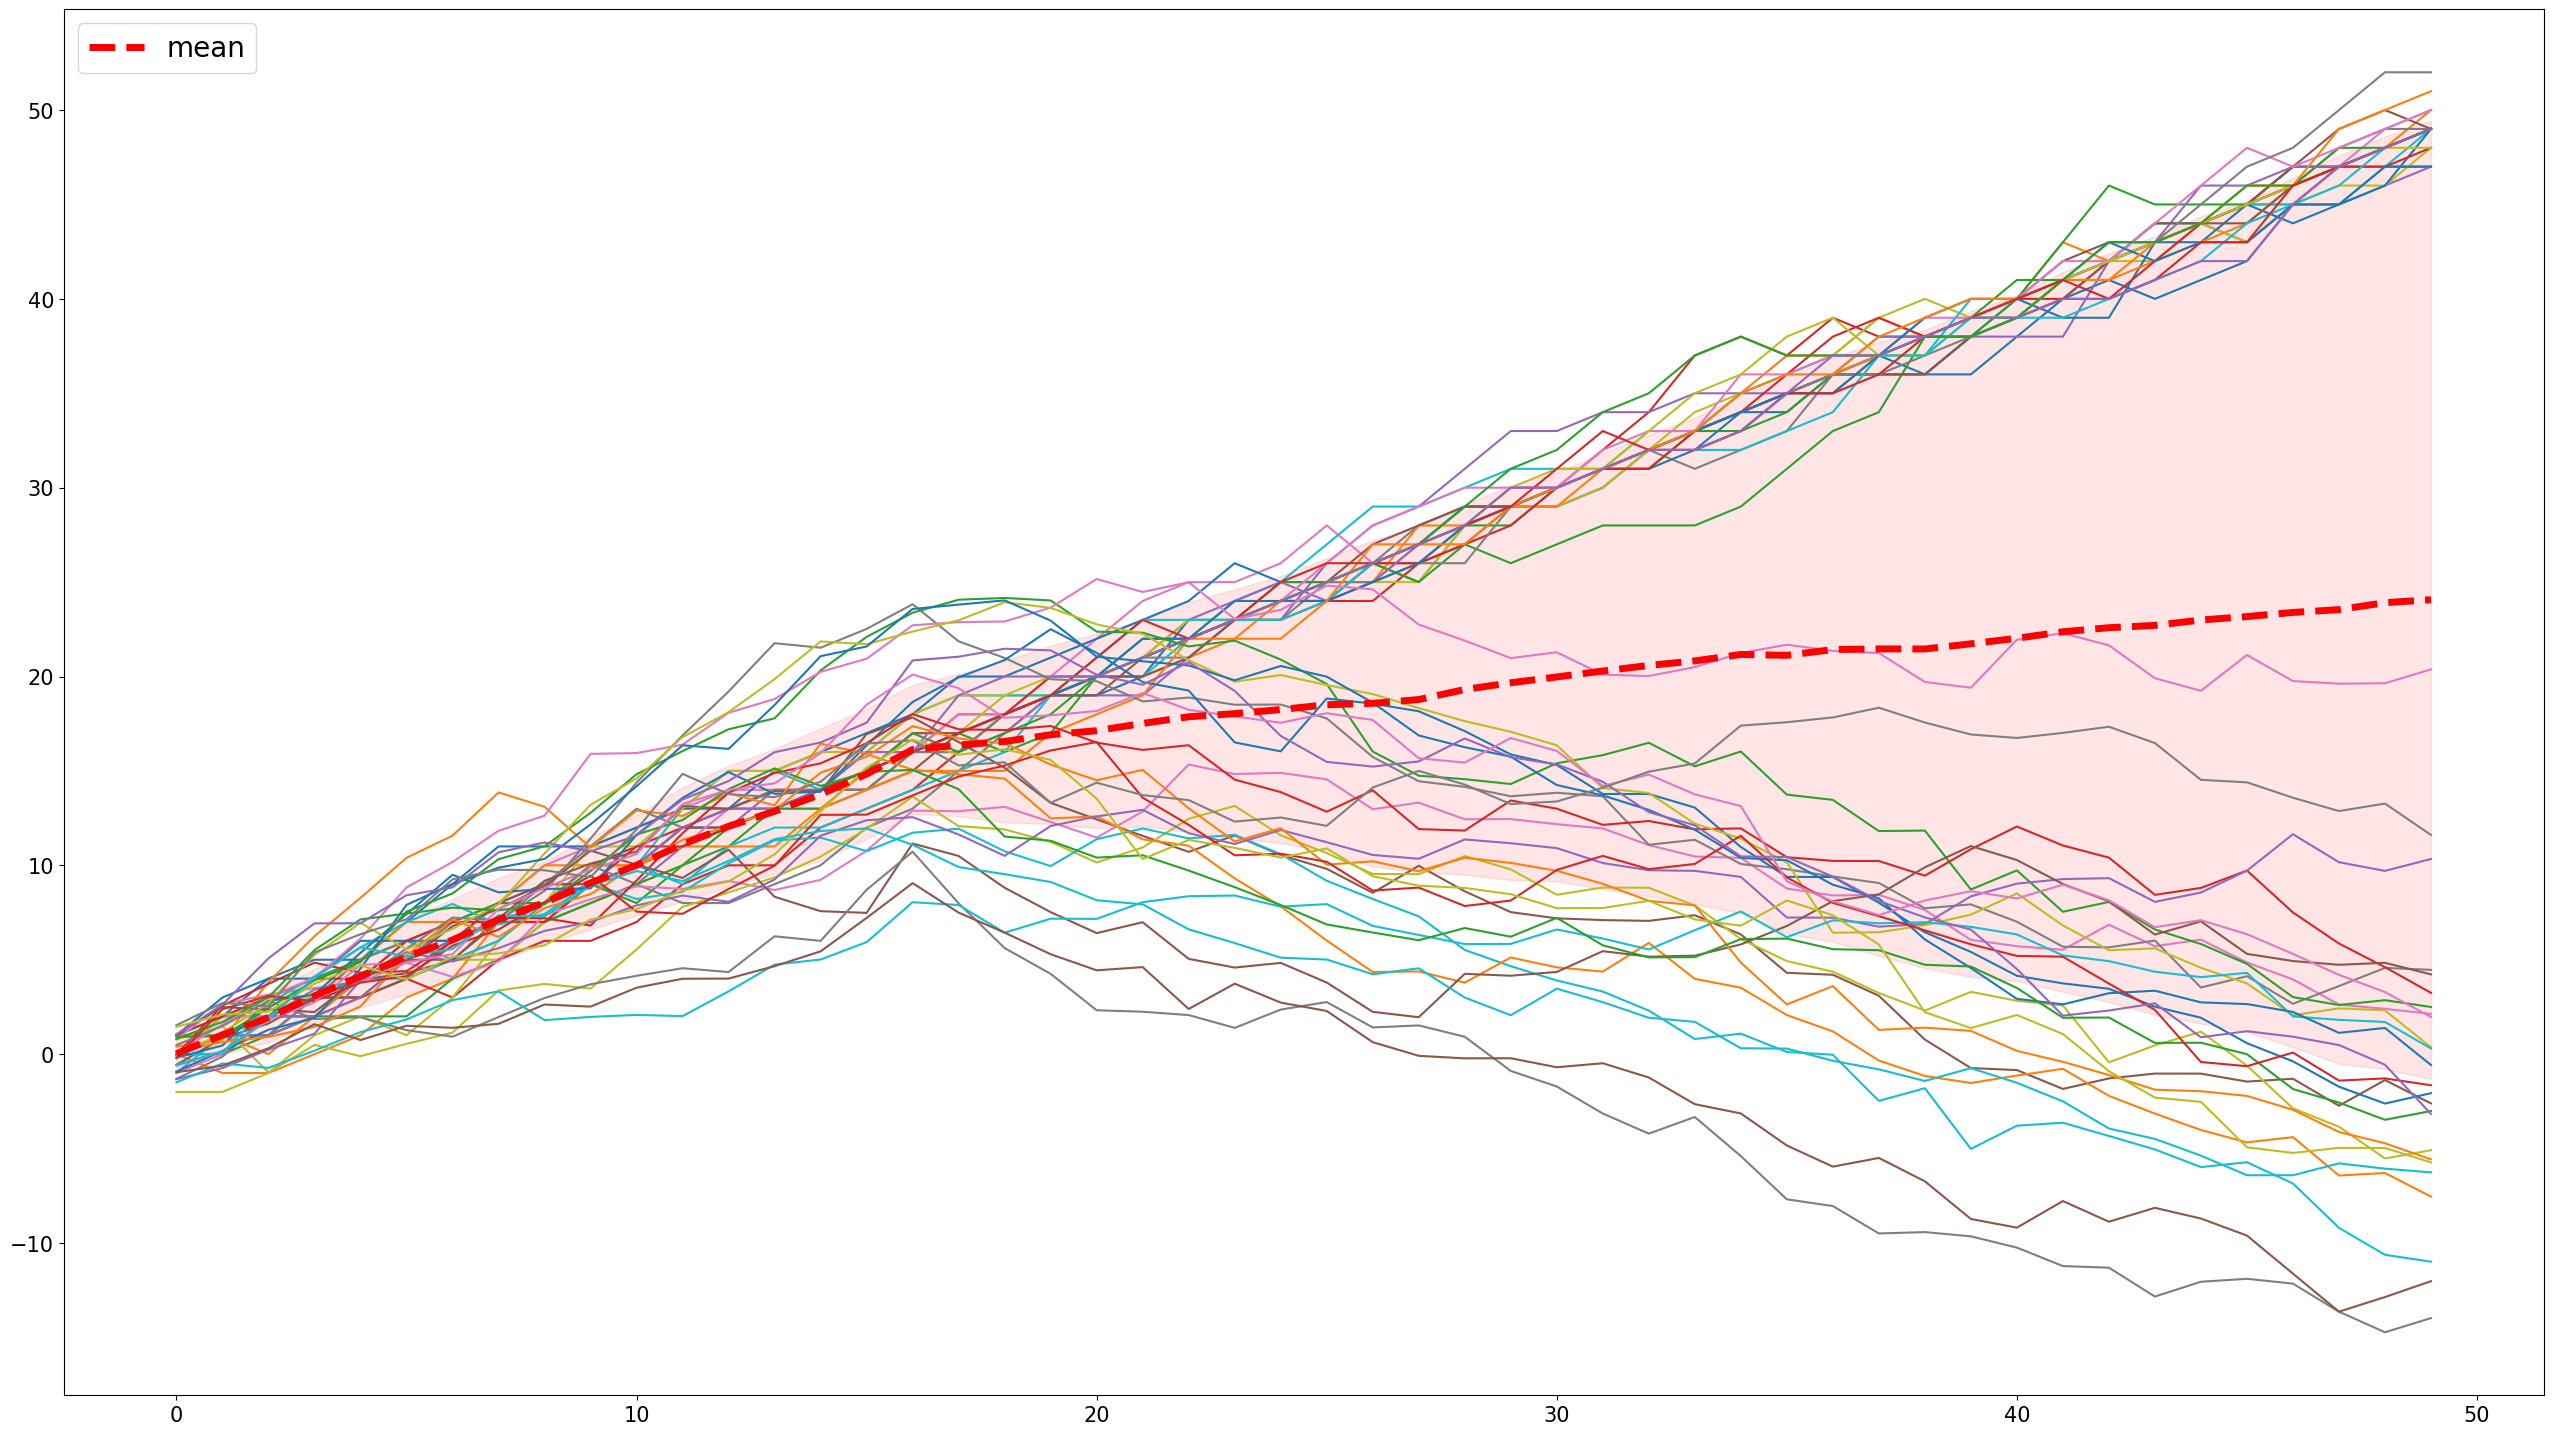

In [6]:
kwargs = {
    "figsize" : (32,18),
    "plot_show_mean" : True,
    "plot_show_std" : True,
}

fig, ax = from_list_to_subplots([np.concatenate(list_members)],**kwargs)

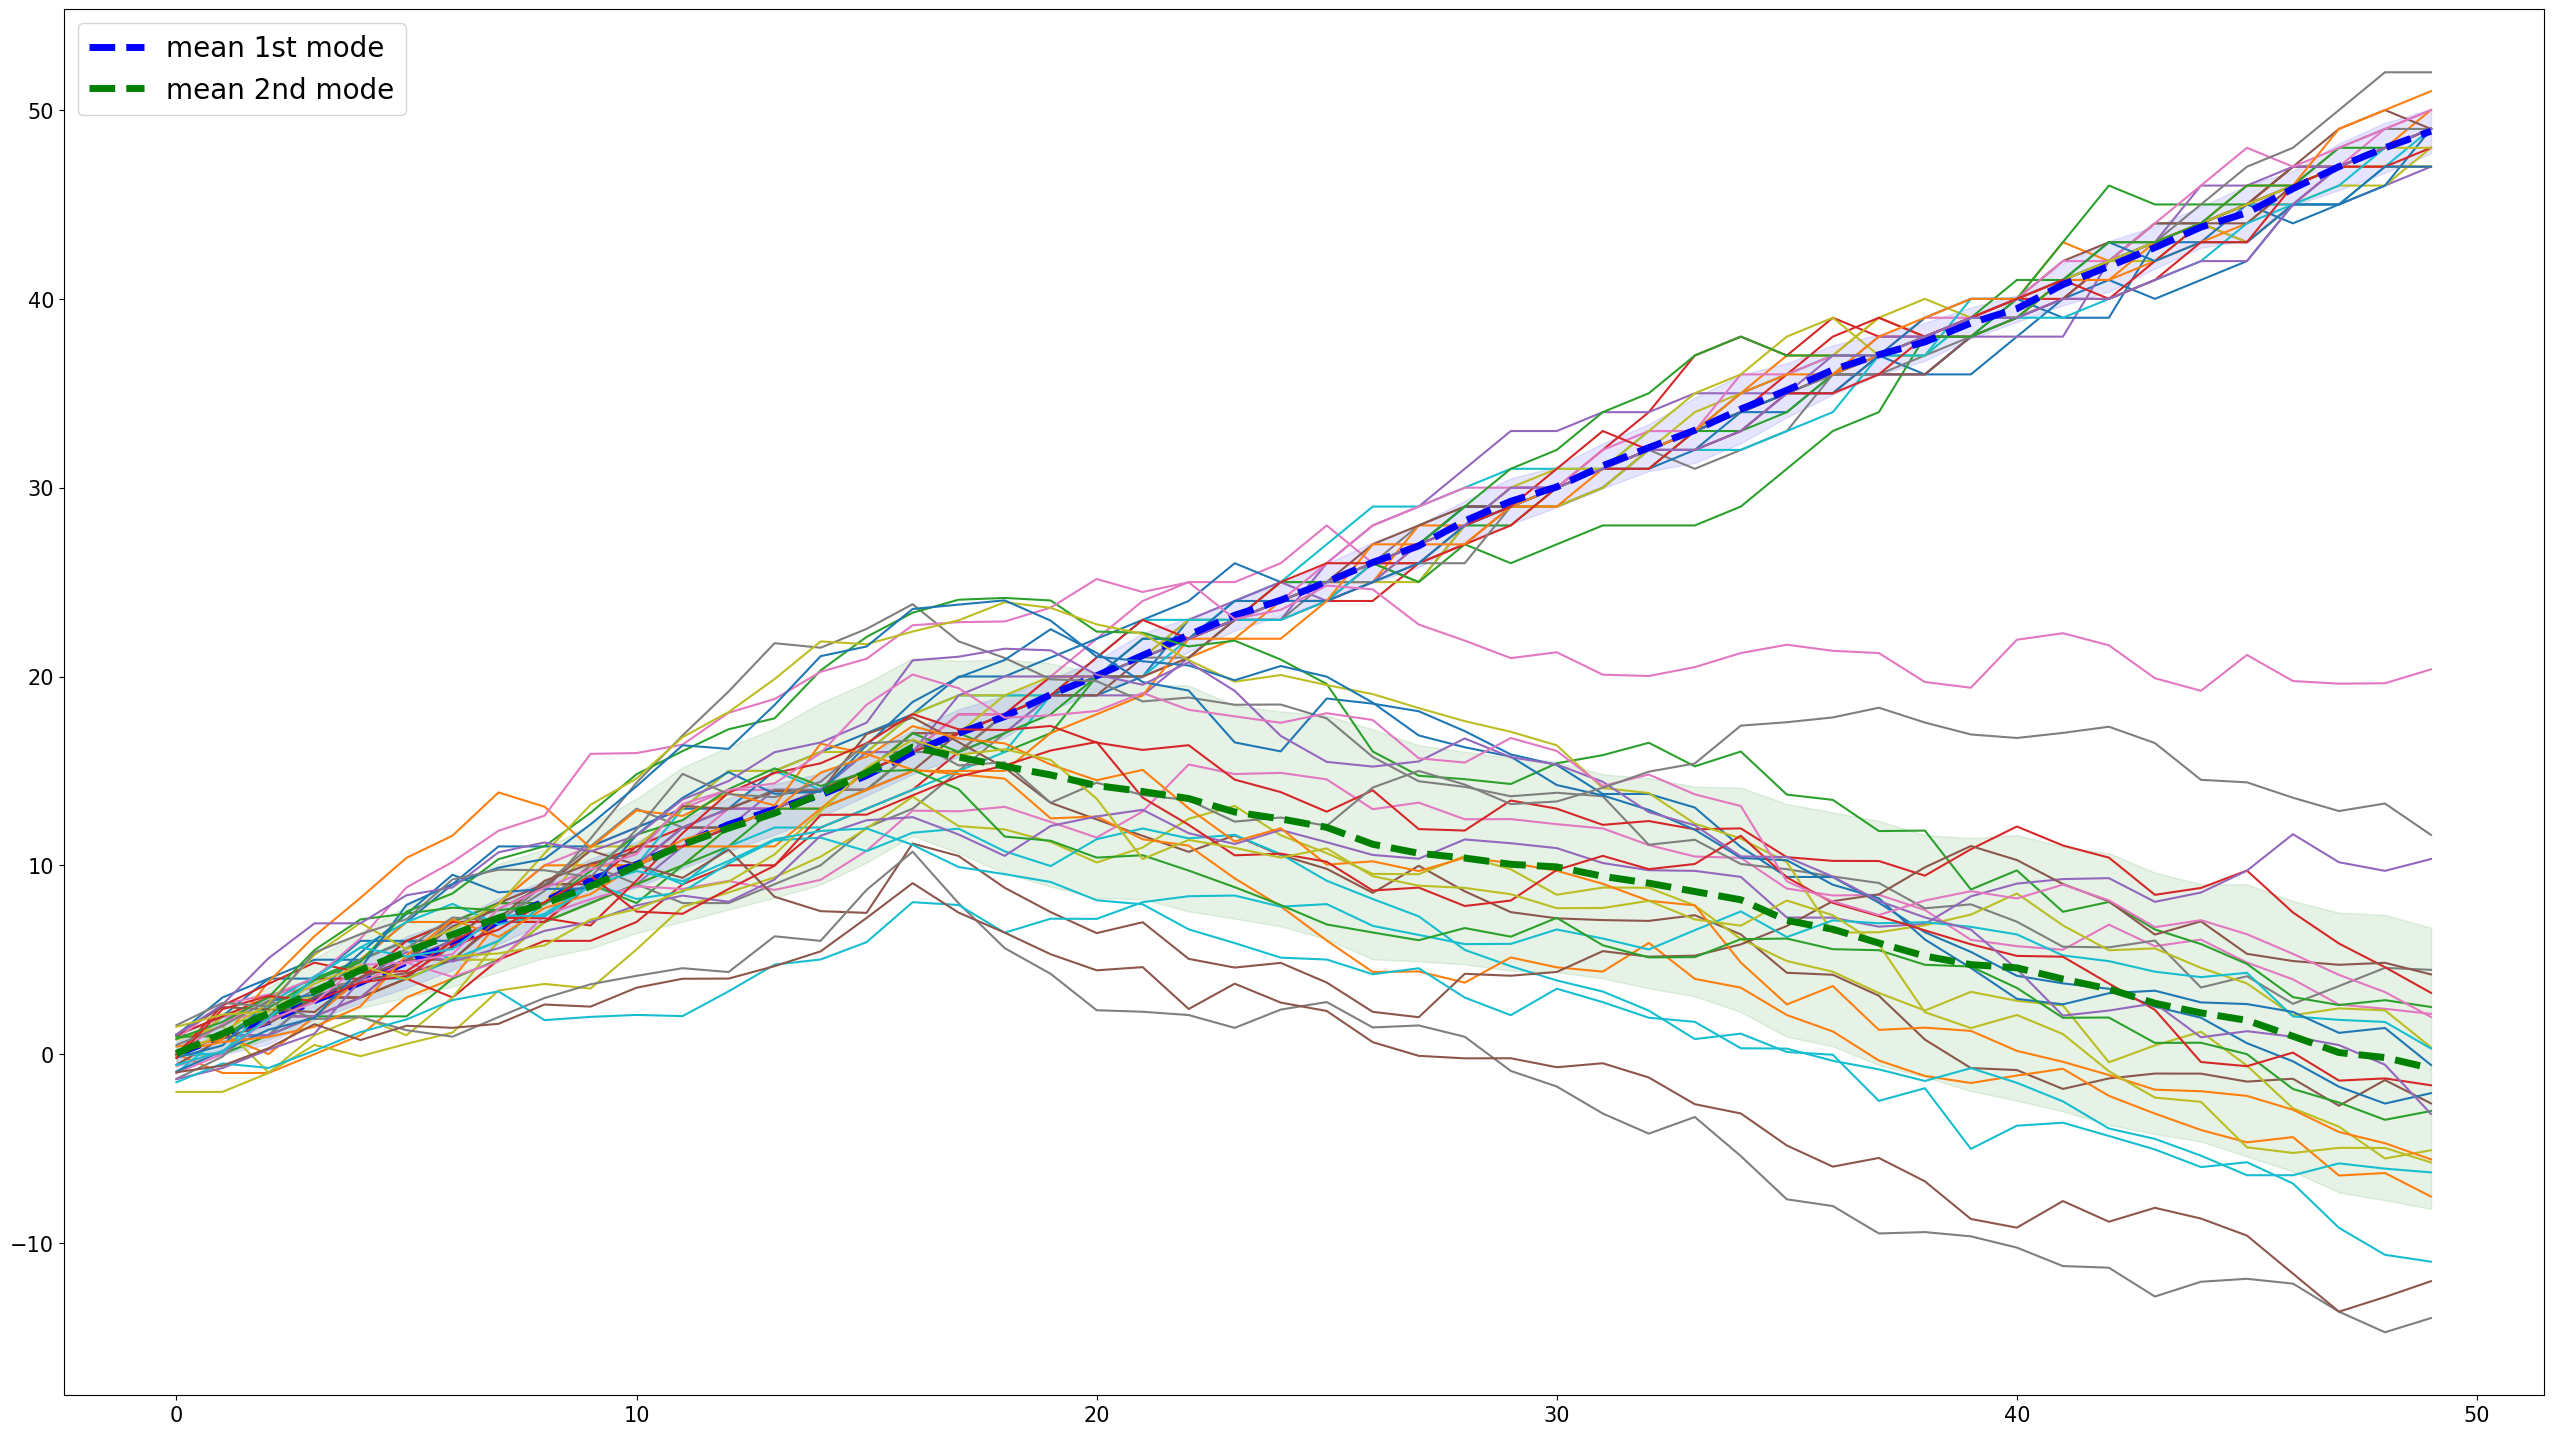

In [7]:
mean_colors = ["blue", "green"]
mean_labels = ["mean 1st mode", "mean 2nd mode"]
kwargs = {
    "figsize" : (32,18),
    "plot_show_mean" : True,
    "plot_show_std" : True,
    "plot_mean_color" : mean_colors[0],
    "plot_show_mean_label" : False
}

fig, axs = from_list_to_subplots([list_members[0]], show=False,**kwargs)

kwargs = {
    "figsize" : (32,18),
    "plot_show_mean" : True,
    "plot_show_std" : True,
    "plot_mean_color" : mean_colors[1],
    "plot_show_mean_label" : False
}

fig, axs = from_list_to_subplots(
    [list_members[1]],
    fig = fig,
    axs = axs,
    show = False,
    **kwargs)

style_labels = [
    {
        "ls" : "--",
        "lw" : 5,
        "color" : mean_colors[0]
    },
    {
        "ls" : "--",
        "lw" : 5,
        "color" : mean_colors[1]
    }]

set_fonts()
axs[0,0] = add_labels_to_legend(
    ax = axs[0,0],
    text_labels=mean_labels,
    style_labels=style_labels,
)

plt.show()

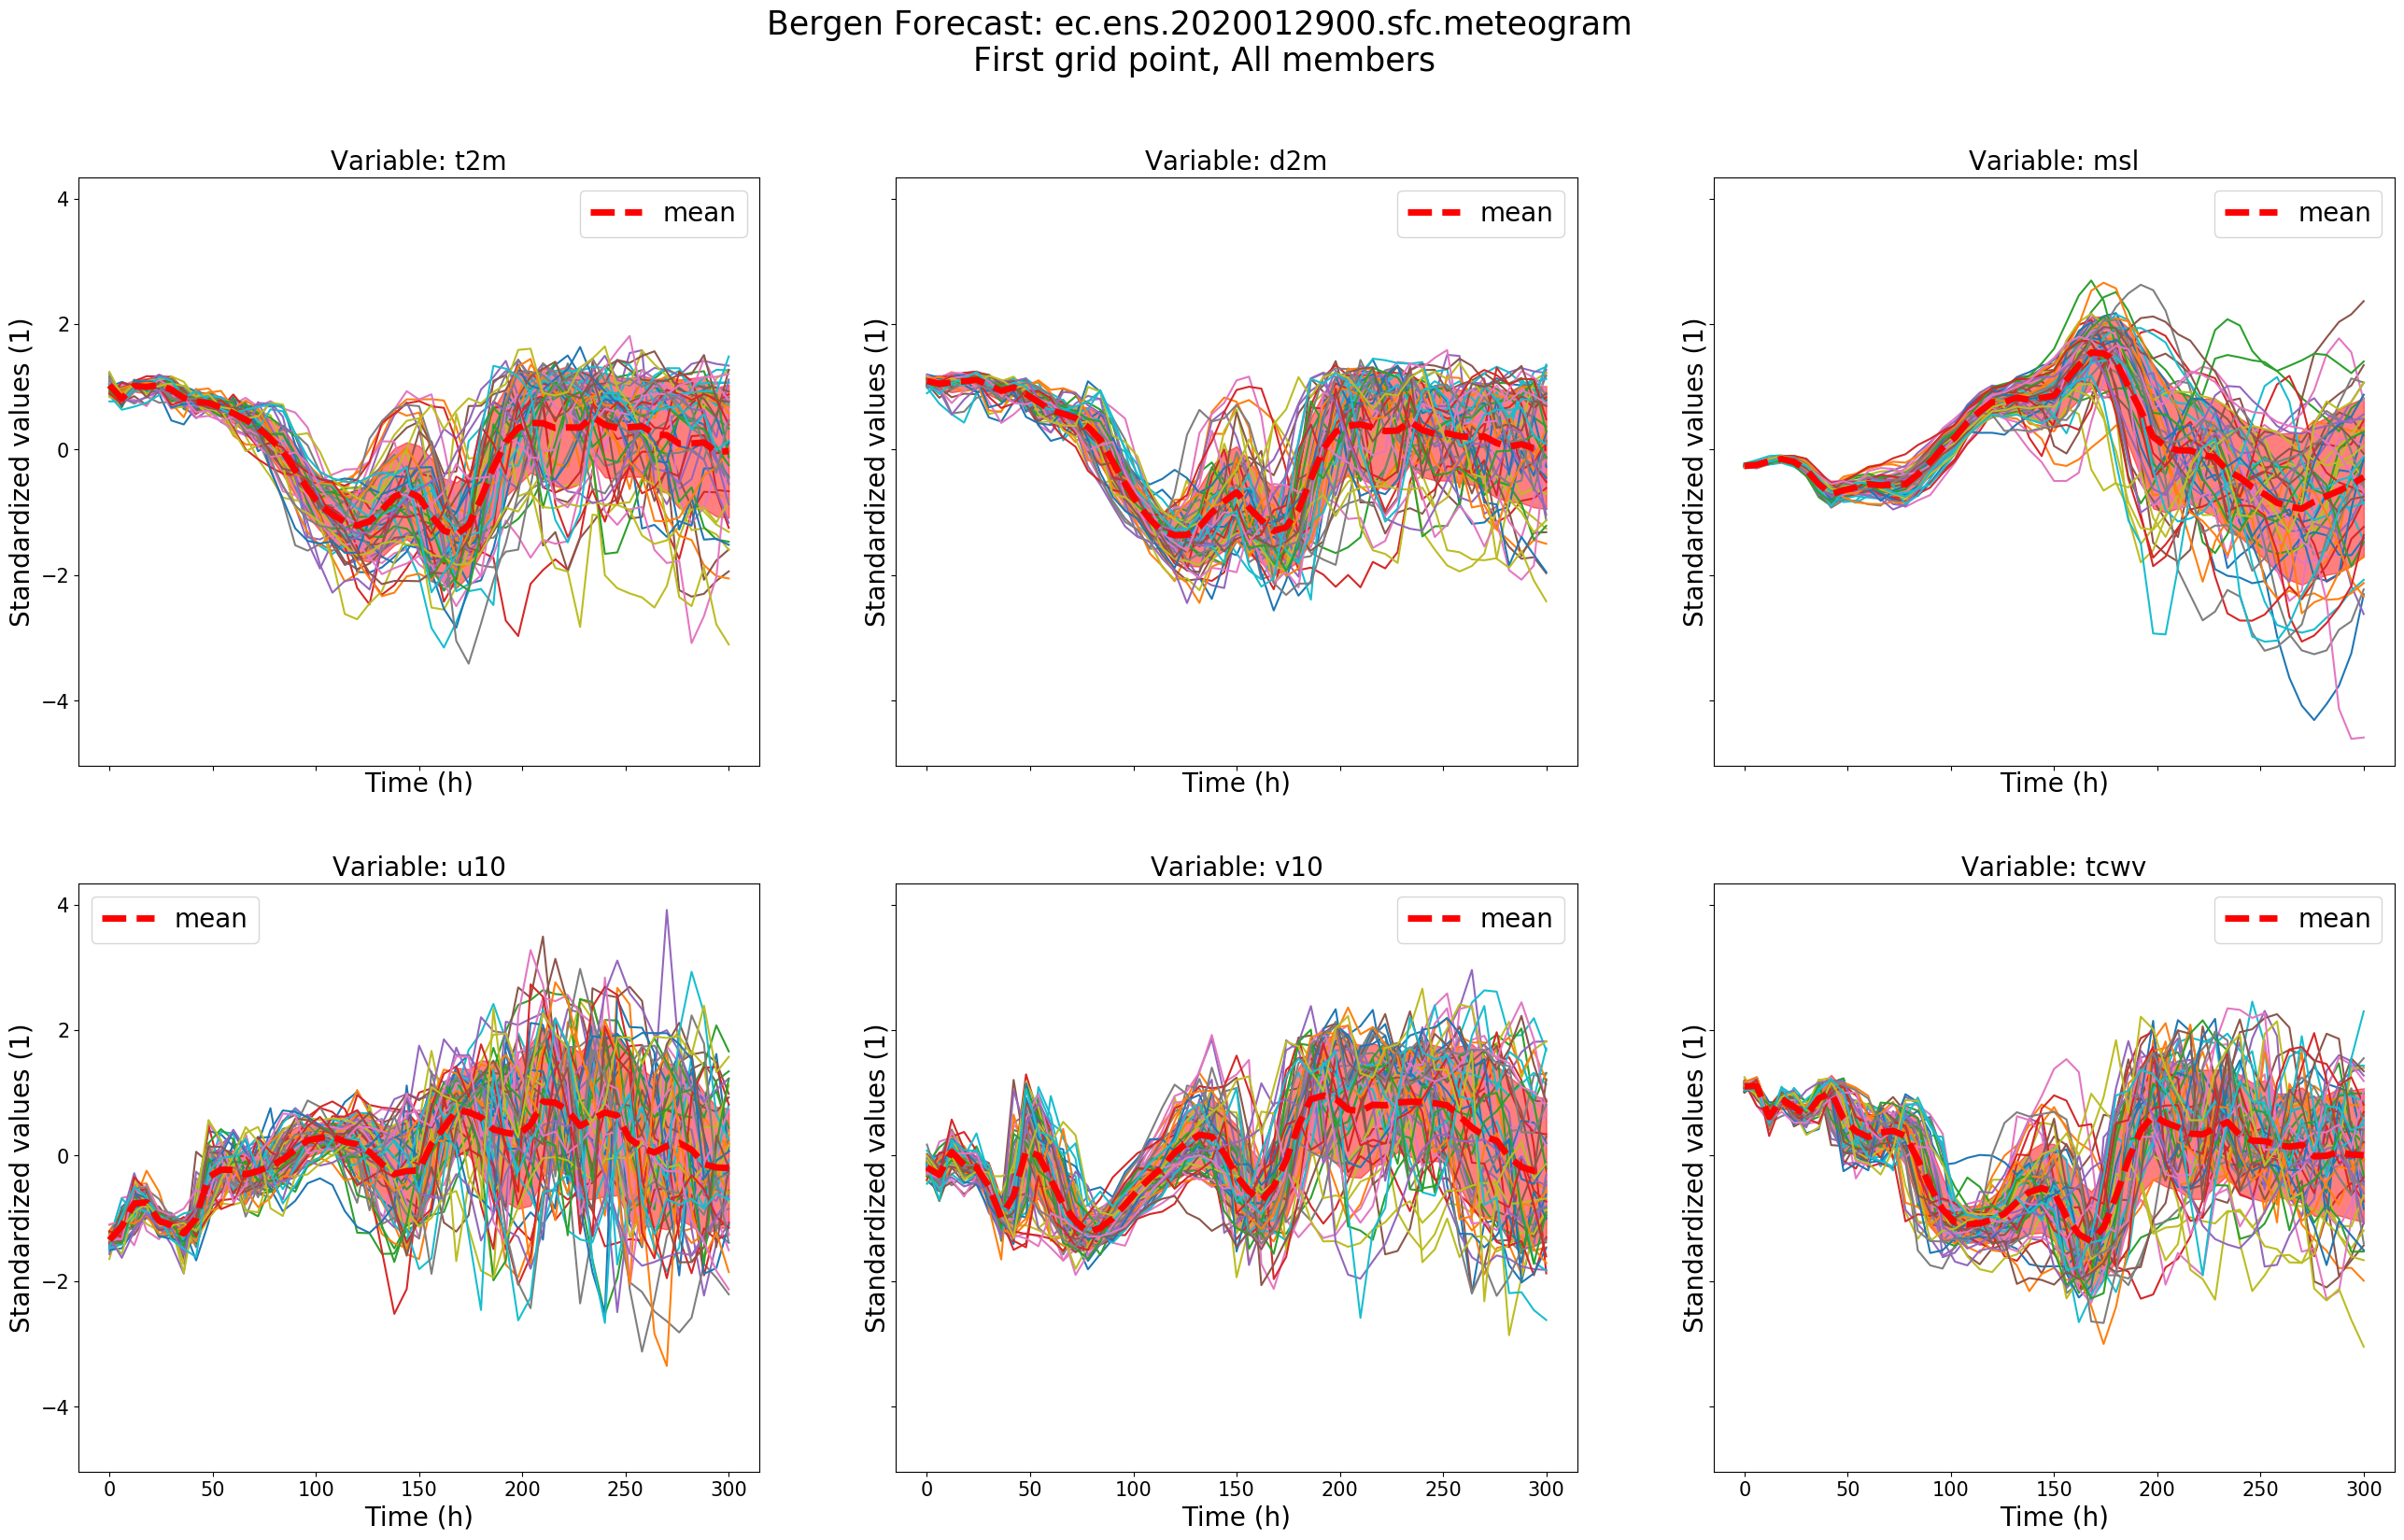

In [8]:

path_data = "/home/natacha/Documents/Work/Data/Bergen/"


path_fig = "/home/natacha/Documents/tmp/figs/all_members_first_location/"

var_names=None
ind_time=None
ind_members=None
ind_long=np.array([0])
ind_lat=np.array([0])

# Choose which files should be used
list_filenames = listdir(path_data)
list_filenames = [fname for fname in list_filenames if fname.startswith("ec.ens.2020012900.sfc.meteogram") and  fname.endswith(".nc")]
# Allow print
descr = False
filename = list_filenames[0]

f = path_data + filename
nc = Dataset(f,'r')

(list_var,list_names) = extract_variables(
    nc=nc,
    var_names=var_names,
    ind_time=ind_time,
    ind_members=ind_members,
    ind_long=ind_long,
    ind_lat=ind_lat,
    descr=descr
)

# Take the log for the tcwv variable
idx = get_indices_element(
    my_list=list_names,
    my_element="tcwv",
)
if idx != -1:
    for i in idx:
        list_var[i] = np.log(list_var[i])


(list_scalers, list_stand_var) = standardize(
    list_var = list_var,
    each_loc = False,
)

list_stand_var = [np.swapaxes(var, 0,1) for var in list_stand_var]
list_stand_var = [np.squeeze(var) for var in list_stand_var]

# Set the initial conditions at time +0h
time = np.array(nc.variables["time"])
time -= time[0]

fig_suptitle = "Bergen Forecast: " + filename[:-3] + "\n First grid point, All members"
list_ax_titles = ["Variable: " + name for name in list_names]
xlabel = "Time (h)"
ylabel = "Standardized values (1)"

kwargs = {
    "figsize" : (32,18),
    "plot_show_mean" : True,
    "plot_show_std" : True,
    "plot_std_alpha" : 0.5,
    
}

fig, axs = from_list_to_subplots(
    list_yvalues=list_stand_var,  # List[ndarray([n_lines, ] n_values )]
    list_xvalues=time, #ndarray(n_values)
    plt_type = "plot",
    fig_suptitle = fig_suptitle,
    list_ax_titles = list_ax_titles,
    list_xlabels = xlabel,
    list_ylabels = ylabel,
    show=False,
    **kwargs
    )


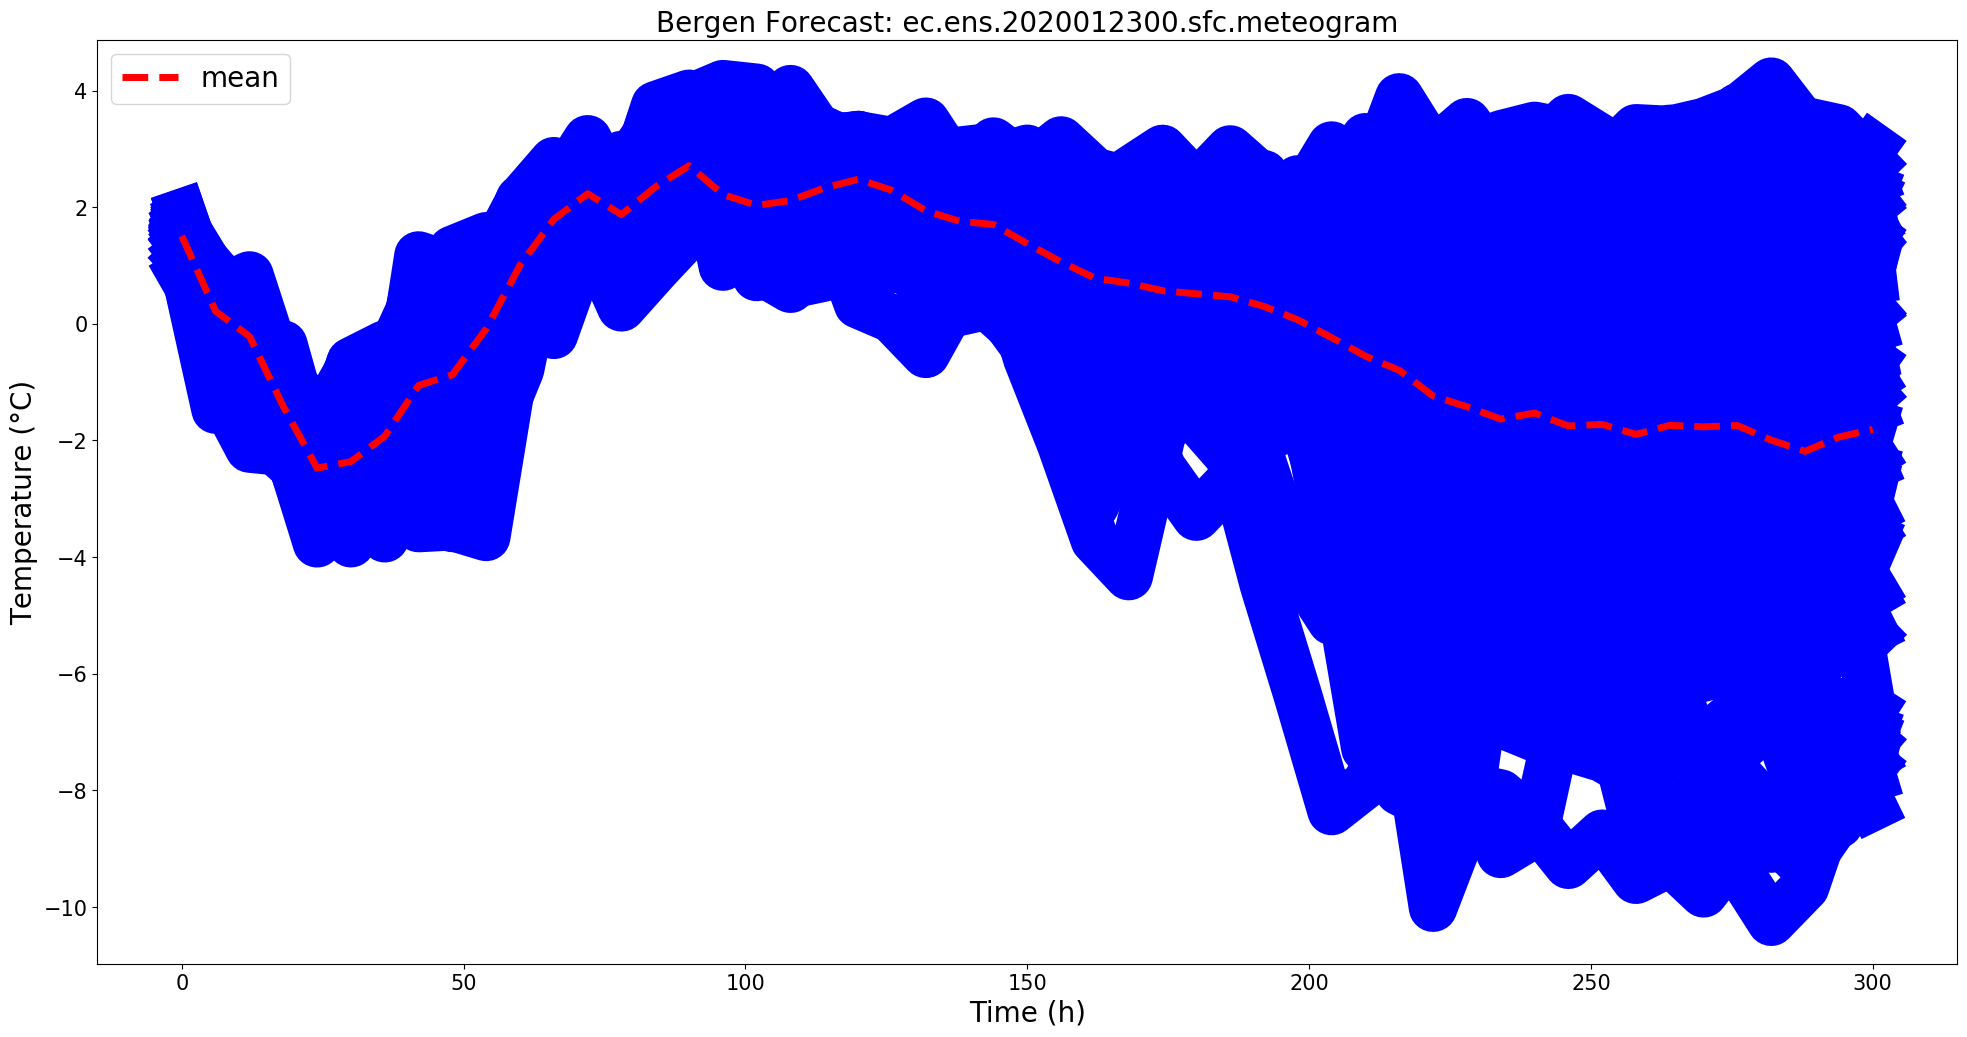

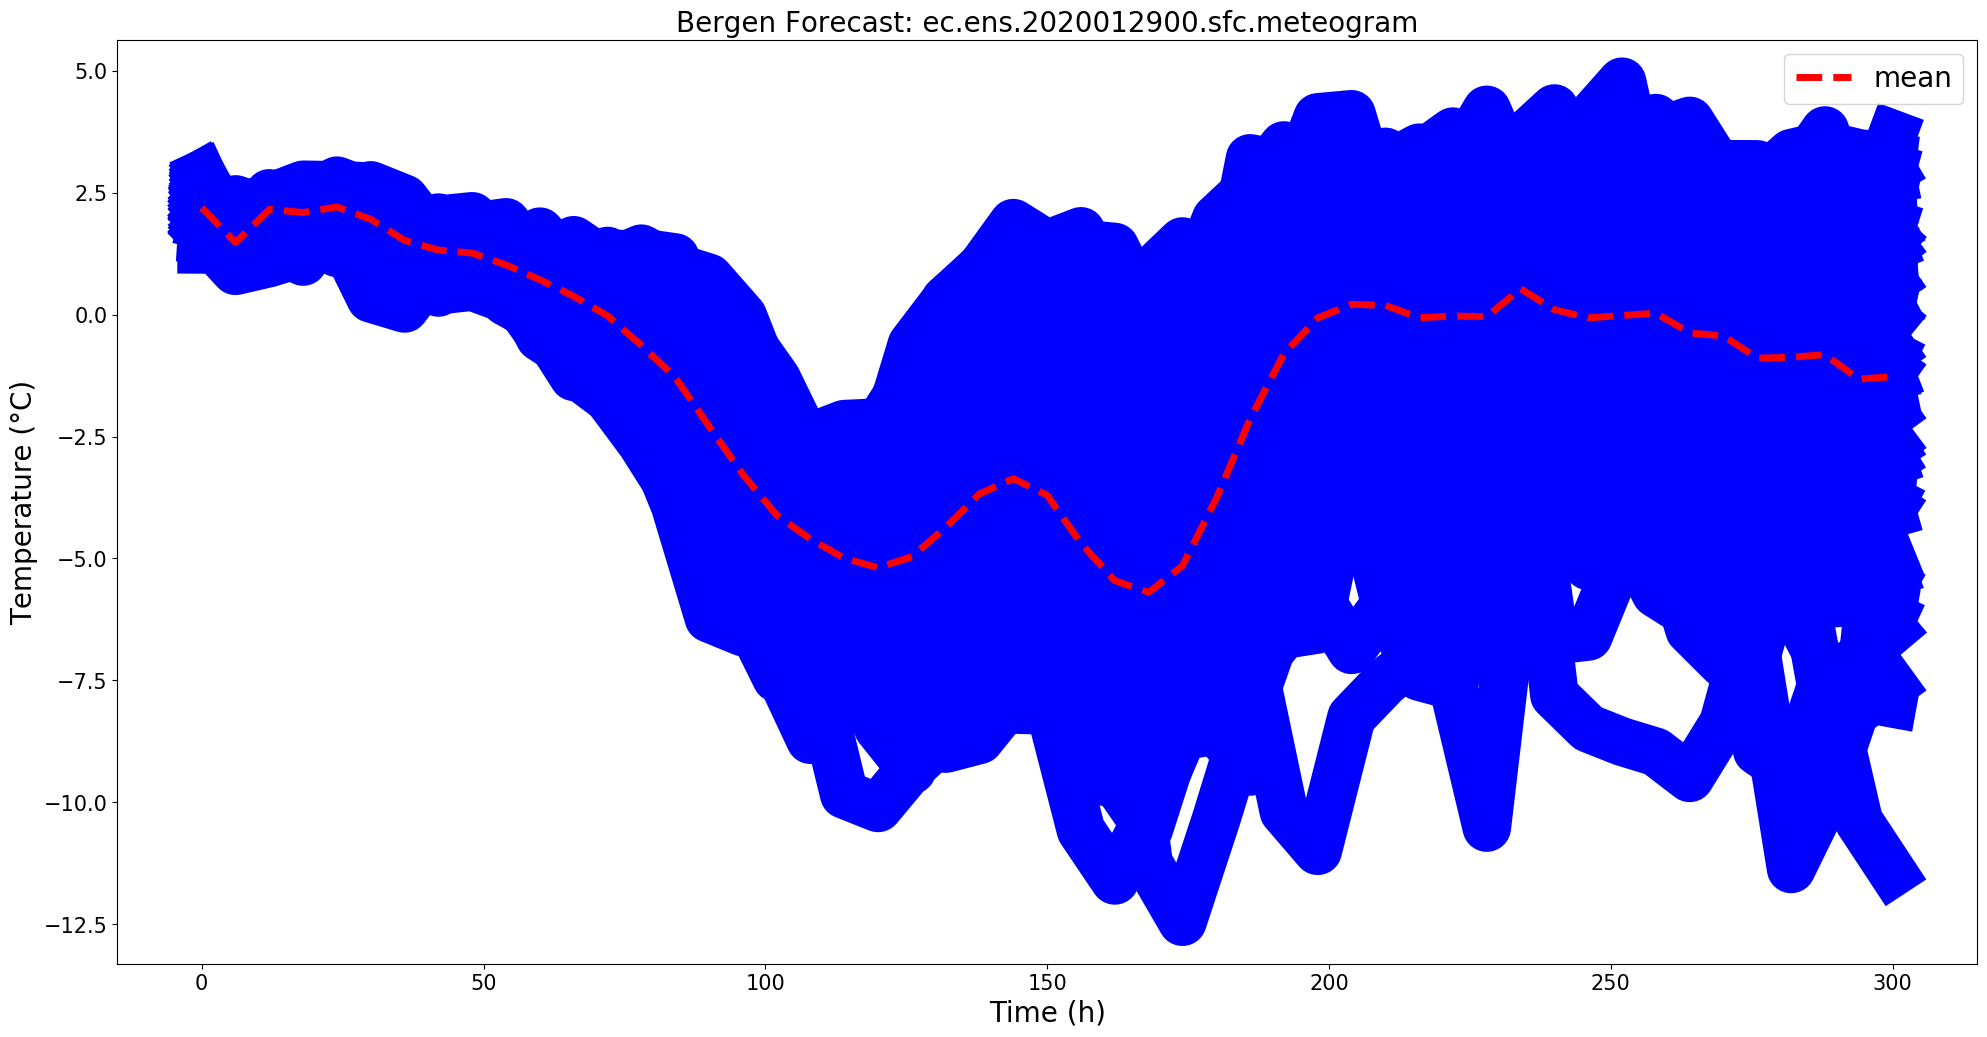

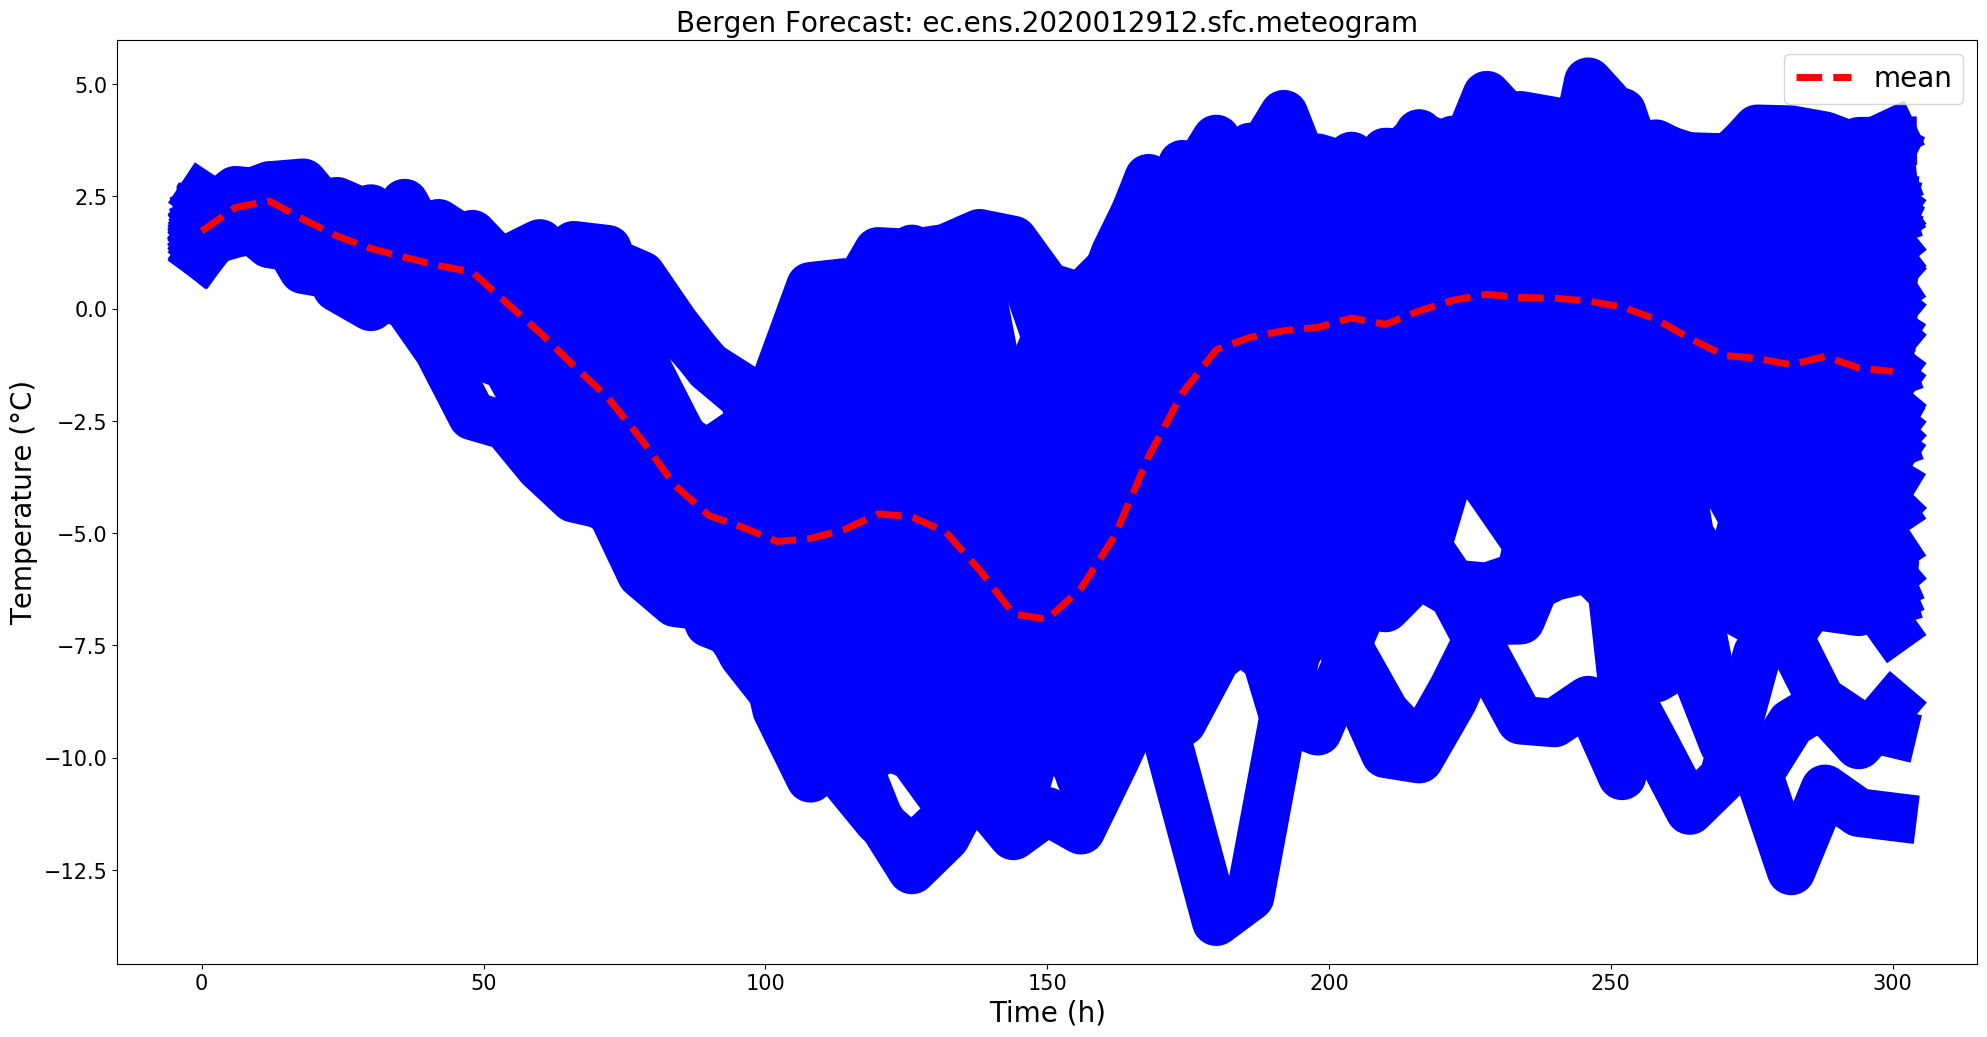

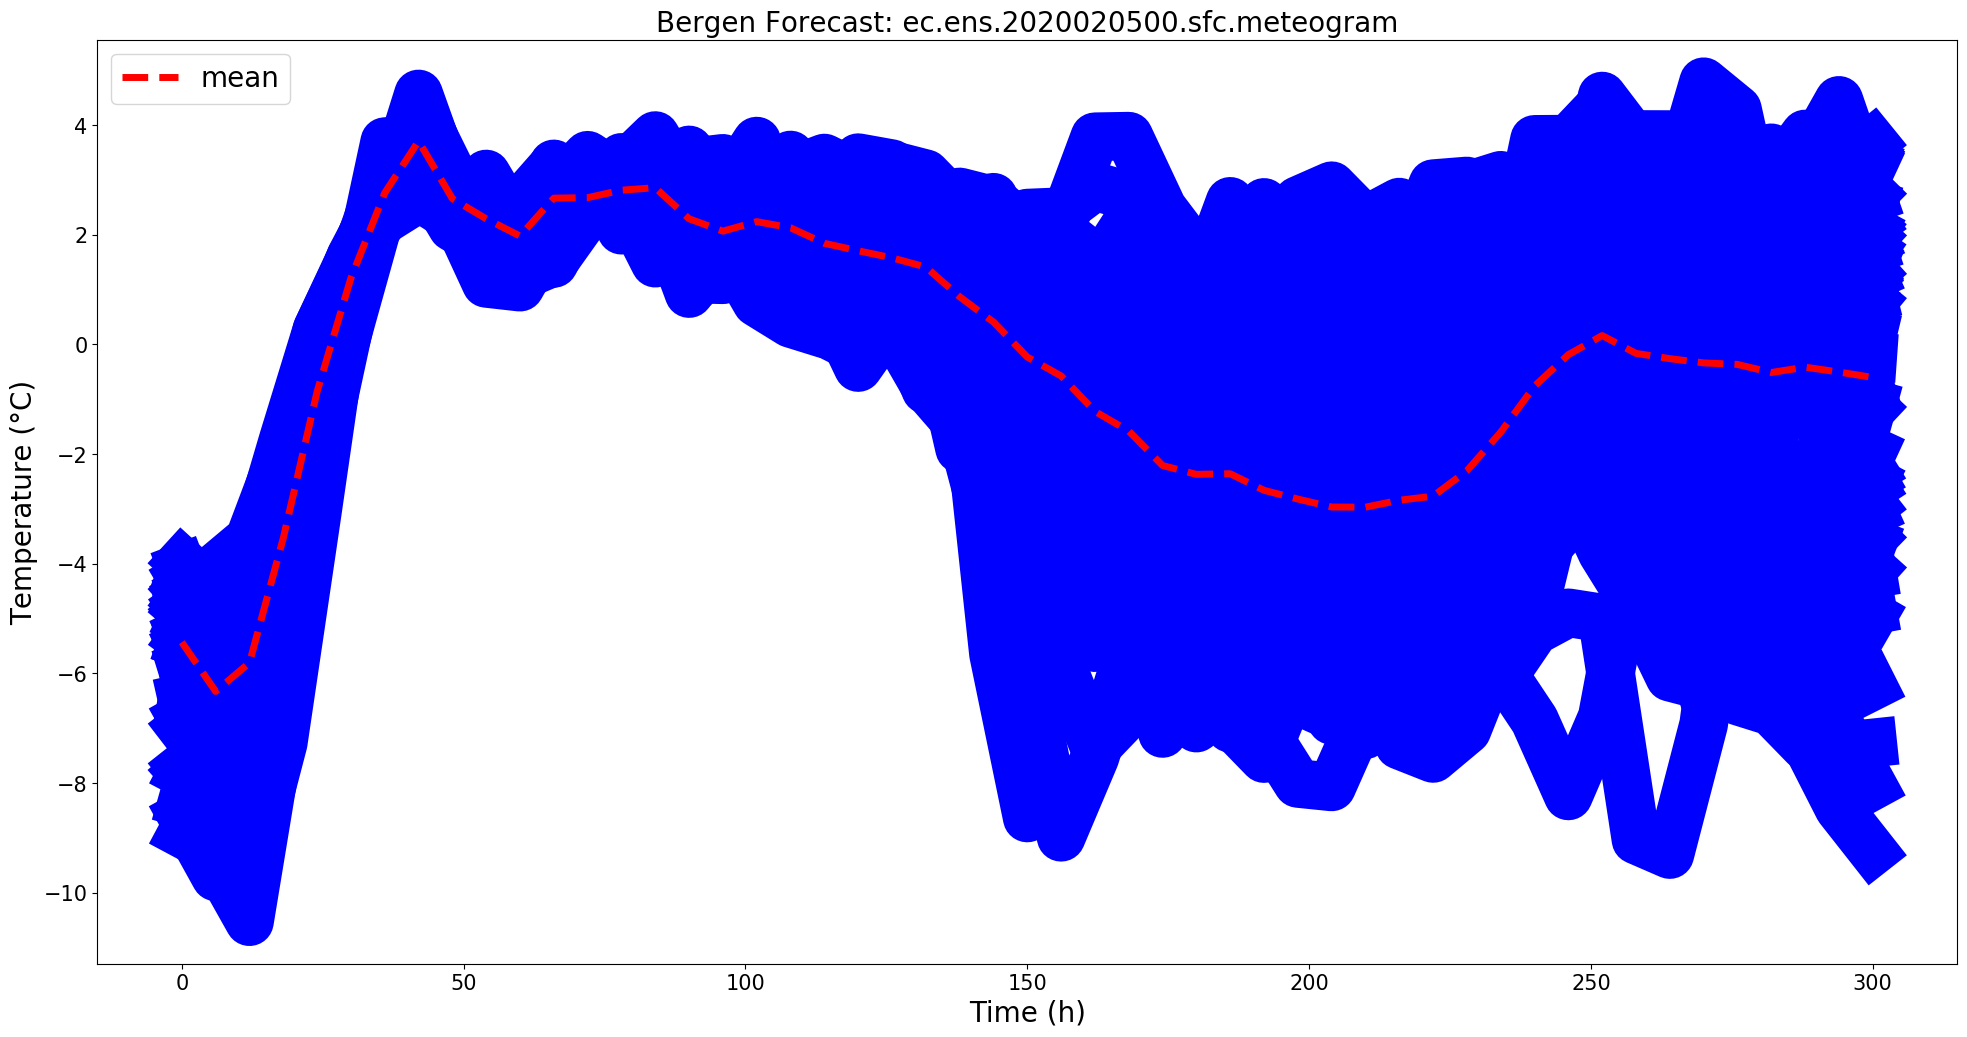

In [9]:
plt.rcParams.update({'font.size': 30})


path_data = "/home/natacha/Documents/Work/Data/Bergen/"


path_fig = "/home/natacha/Documents/tmp/figs/all_members_first_location/"

var_names=["t2m"]
ind_time=None
ind_members=None
ind_long=np.array([0])
ind_lat=np.array([0])

# Choose which files should be used
list_filenames = listdir(path_data)
list_filenames = ['ec.ens.2020012300.sfc.meteogram.nc','ec.ens.2020012900.sfc.meteogram.nc', 'ec.ens.2020012912.sfc.meteogram.nc','ec.ens.2020020500.sfc.meteogram.nc',]
# Allow print
descr = False
for filename in list_filenames:

    f = path_data + filename
    nc = Dataset(f,'r')

    (list_var,list_names) = extract_variables(
        nc=nc,
        var_names=var_names,
        ind_time=ind_time,
        ind_members=ind_members,
        ind_long=ind_long,
        ind_lat=ind_lat,
        descr=descr
    )


    t2m = np.transpose(list_var[0]).squeeze()-273.15

    # Set the initial conditions at time +0h
    time = np.array(nc.variables["time"])
    time -= time[0]

    list_ax_titles = "Bergen Forecast: " + filename[:-3]
    xlabel = "Time (h)"
    ylabel = "Temperature (°C)"

    kwargs = {
        "figsize" : (24,12),
        "plot_show_mean" : True,
        "plot_show_std" : True,
        "plot_mean_zorder" : 3,
        "plot_std_zorder" : 3,
        "plot_std_alpha" : 0,
        "lw" : 35,
        "c" : "b",
        "alpha" : 0.04, 
    }


    fig, axs = from_list_to_subplots(
        list_yvalues=t2m,  # List[ndarray([n_lines, ] n_values )]
        list_xvalues=time, #ndarray(n_values)
        plt_type = "plot",
        fig_suptitle = None,
        list_ax_titles = list_ax_titles,
        list_xlabels = xlabel,
        list_ylabels = ylabel,
        show=False,
        **kwargs
        )
    # for member in t2m:
    #     axs[0,0].plot(time, member, lw=20, alpha=0.1, color="b")
    